<a href="https://colab.research.google.com/github/pfs1977/EngagingInCS/blob/main/EngagingInCS_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motivação ambiental


* A temperatura da água à superfície do oceano é um atributo físico importante dos oceanos. À medida que os oceanos absorvem mais calor, a temperatura da superfície do mar aumenta e os padrões de circulação oceânica que transportam água quente e fria à volta do globo alteram-se.

* As mudanças na temperatura da superfície do mar podem alterar os ecossistemas marinhos de várias formas, alterarndo padrões de migração e reprodução, assim como ameaçando a vida oceânica sensível.

* Como os oceanos interagem continuamente com a atmosfera, a temperatura da superfície do mar também pode ter efeitos profundos no clima global, aumentando o risco de chuva intensa e neve, alterando as trajectórias das tempestades, prolongando a época de crescimento de certas bactérias com risco para a nossa saúde.

* Podes aprender mais sobre este assuno no seguinte link: https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature


# Motivação técnica

* Para se mitigar as alterações climáticas é necessário compreender os fenómenos que as influenciam e ser capaz de prever como é que estes evoluem no futuro para assim conseguirmos criar políticas adequadas.
* O estudo dos fenómenos passa muito pela análise de vastas quantidades de dados** numéricos e da criação de modelos que possamos usar para prever dados quando estes não existem, por exemplo relativamente ao futuro. Realizar essa análise e síntese de modelos de forma manual é impraticável.
* Os computadores têm a capacidade de realizar essas tarefas de forma rápida e sem erros. A essa área da **Informática** chamamos **Ciência dos Dados**. Contudo, os computadores requerem que lhe seja explicado como fazer essa análise.
* Programar não é mais do que comunicar procedimentos para o computador realizar. Aprender a programar é uma combinação de aprender uma nova língua e formalisar raciocínio lógico.
* Estas características da programação tornam-na muito aliciante para quem gosta de matemática e de resolver problemas.
* Programar requer muita atenção ao detalhe, pois o computador requer que o que lhe comuniquemos esteja exento de erros sintáticos (semelhante ao conceito de erro ortográfico) e de erros semânticos (semelhante ao conceito de erro gramatical).
* Os computadores têm a capacidade de indicar ao programador praticamente em tempo-real problemas no código que o programador está a desenvolver. Este feedback muito imediato torna a tarefa da progrmação envolvente, semelhante ao que sentimos quando jogamos um vídeo jogo.
* De seguida vamos abordar o problema da previsão da temperatura do oceano através da linguagem de programação mais utilizada no momento atual, o Python.
* Grande parte do código está já preparado, tendo apenas que o executar e observar os resultados. Contudo, para ser mais interessante, também terás de preencher algumas zonas do código, indicadas com **[...]**.
* Esperamos que te **divirtas** e que consigas sentir o quão **fascinante** e **impactante** é a **Engenharia Informática**!
🙂


#Preparação do ambiente de programação

Apenas carrega em play e aguarda um pouco.

In [1]:
!rm -r EngagingInCS/
!git clone https://github.com/pfs1977/EngagingInCS.git
import sys
sys.path.append('/content/EngagingInCS/')

Cloning into 'EngagingInCS'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 65 (delta 38), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (65/65), 22.56 KiB | 2.51 MiB/s, done.
Resolving deltas: 100% (38/38), done.


# Análise do data set

* Fomos descarregar um data set com as temperaturas dos oceanos neste site:
https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature

* Os dados são apresentados como diferenças em comparação com a temperatura média da superfície do mar global entre 1971 e 2000. Os dados cobrem o período compreendido entre 1880 e 2020.

* Os dados estão armazenados num ficheiro csv (comma separated values). A primeira linha do ficheiro contém um cabeçalho com o nome das várias colunas de dados, todas separadas com ponto e vírgula.

* Atenção que os valores estão em grays Fahrenheit. Uma diferença de 1 grau Fahrenheit equivale a aproximadamente 0,5556 graus Celsius.

Vamos usar o camando **head** para observarmos as primeiras 5 linhas do ficheiro. (podes alterar no comando o valor numérico após **n** para veres mais linhas):

In [3]:
!head -n 5 EngagingInCS/sea-surface-temp-historic-data.csv

Year,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval
1880,-0.42,-0.628152,-0.211848
1881,-0.33,-0.531096,-0.128904
1882,-0.348,-0.545568,-0.150432
1883,-0.456,-0.65004,-0.26196


Vamos agora usar o comando **tail** para observar as últimas 5 linhas do ficheiro (podes alterar no comando o valor numérico após **n** para veres mais linhas):

In [4]:
!tail -n [...] EngagingInCS/[...].csv

tail: invalid number of lines: ‘[...]’


In [5]:
!tail -n 5 EngagingInCS/sea-surface-temp-historic-data.csv

2016,0.93,0.891192,0.968808
2017,0.822,0.779664,0.864336
2018,0.732,0.686136,0.777864
2019,0.876,0.819552,0.932448
2020,0.84,0.797664,0.882336

# Importação de biblioteca

* Programar envolve integrar vários níveis de abstração. Existem aspetos de detalhe, que chamamos de baixo nível, que por vezes são resolvidos por bibliotecas de software já existentes no sistema.

* Programar é uma atividade em equipa. Nessas equipas as pessoas ficam com diferentes responsabilidades. Por exemplo, um programador desenvolve as tais bibliotecas de baixo nível, enquanto que outros as usam para resolver tarefas de maior abstração.

* Neste caso nós preparámos uma bibliotica para vocês usarem, que está armazenada no ficheiro Python "utils.py".

* Vamos então começar por importar para o nosso projeto as várias funcionalidades de baixo nível desse ficheiro.

In [2]:
import utils

Se tiveres curiosidade pode executar o comando **cat** para veres o conteúdo desse ficheiro. Não te assustes com o conteúdo. Apenas parece complicado porque é uma língua que ainda não conheces. Como qualquer outra língua, é apenas uma questão de prática para a aprenderes.

In [7]:
!cat EngagingInCS/utils.py

from functools import partial
import matplotlib.pyplot as plt
import numpy
import pandas

canvas = None
canvas_aux = None


def create_partial_function(handler, **kwargs):
    return partial(handler, **kwargs)


def react_to_keys(years_vector, temperatures_vector,
                  a3, a2, a1, a0,
                  year_min, year_mid, year_max,
                  callback):
    partial_on_key_pressed = create_partial_function(callback,
                                                     years_vector=years_vector,
                                                     temperatures_vector=temperatures_vector,
                                                     a3=a3, a2=a2, a1=a1, a0=a0,
                                                     year_min=year_min, year_mid=year_mid, year_max=year_max)
    canvas.canvas.mpl_connect('key_press_event', partial_on_key_pressed)
    plt.show()

def set_graph(x_label, y_label, x_min, x_max, y_min, y_max):
    plt.xlabel(x_label)
    plt.ylabel(y_label

# Impressão no ecrã

Podes imprimir conteúdo no ecrã durante a execução do teu código. Em programação, ao texto chamamos *strings*, sendo que estas são delimitadas por aspas. Experimenta o exemplo seguinte, que invoca a função **print** para imprimir a *string* passada como argumento de entrada.

In [8]:
print("hello world")

hello world


Ajusta a seguinte linha de código para dizer olá mundo em português.

In [9]:
print([...])

[Ellipsis]


Podemos guardar informação em variáveis, tal como na matemática. Para isso utilizamos o operador =, que tem um significado diferente do da matemática. Ele representa atribuição. Por exemplo A = B significa que o conteúdo da variável B é copiado para a variável A, ficando no final ambas com o mesmo valor. Podes pensar no "=" como uma seta para a esquerda: "<-".Experimenta o seguinte exemplo, que começa por copiar um texto para dentro da variável a, que é depois impressa no ecrã.

In [10]:
a = "hello world"
print(a)

hello world


De seguida demonstra-se que as variáveis não armazenam apenas texto, também podem armazenar números naturais e reais.

In [11]:
a=1234
print(a)

1234


Podemos juntar textos (concatenar) utilizando o operaor +. Se quisermos juntar um texto com um número, temos primeiro de transformar o número em texto através da função **str**. Essa função recebe um valor que não é uma *string* como argumento de entrada e devolve a sua versão em *string*. No fundo a ideia é que se tiveres *string1* e *string2*, **string1 + string2** resulta numa *string* composta. Experimenta o seguinte exemplo.

In [12]:
print("hello world " + str(a))

hello world 1234


Vamos praticar o que acabaram de aprender. Criem uma variável **idade** com a vossa idade e façam aparecer no ecrã "olá" seguido do conteúdo dessa variável.

In [13]:
idade = [...]
print([...] + [...])

[Ellipsis, Ellipsis]


# Carregamento do dataset

Vamos usar a função **read_columm_from_datafile** para ler a coluna de dados **Year** do ficheiro csv e armazenar essa coluna sob a forma de vetor em **years_vector**. Este vetor vai então armazenar de forma ordenada todos os anos para os quais há registos no ficheiro. A função **read_columm_from_datafile** recee dois argumentos, o primeiro que indica onde está o ficheiro e o segundo que indica que coluna desse ficheiro pretendemos processar.

In [3]:
years_vector = utils.read_columm_from_datafile(
    datafile_path="EngagingInCS/sea-surface-temp-historic-data.csv",
    column_name="Year")

Vamos agora usar a função **print** para imprimir no ecrã o conteúdo do vetor que carregámos do ficheiro.

In [15]:
print(years_vector)

[1880. 1881. 1882. 1883. 1884. 1885. 1886. 1887. 1888. 1889. 1890. 1891.
 1892. 1893. 1894. 1895. 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903.
 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915.
 1916. 1917. 1918. 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927.
 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939.
 1940. 1941. 1942. 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951.
 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963.
 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975.
 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987.
 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999.
 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020.]


Vamos usar novamente a função **read_columm_from_datafile**, mas agora para ler a coluna de dados **Annual anomaly** do ficheiro csv e armazenar essa coluna sob a forma de vetor em **temperatures_vector**. Este vetor vai então armazenar de forma ordenada todos as temperaturas das quais há registo no ficheiro. Desta vez deixámos uma parte para vocês preencherem.

In [16]:
temperatures_vector = utils.read_columm_from_datafile(
    datafile_path="[...]",
    column_name="[...]")

FileNotFoundError: [Errno 2] No such file or directory: '[...]'

In [4]:
temperatures_vector = utils.read_columm_from_datafile(
    datafile_path="EngagingInCS/sea-surface-temp-historic-data.csv",
    column_name="Annual anomaly")

Vamos imprimir o vetor que acabámos de criar para verificar que o carregamento foi realizado de forma correta. Para isso tens de completar a linha de código seguinte. Verifica sempre todas as tuas ações. O truque é avançar pouco de cada vez e testar muito. E nunca te esqueças, **"a máquina tem sempre razão"!**. Um corolário deste axioma é **"o problema está sempre entre o teclado e a cadeira"**! 😜

In [ ]:
print([...])

In [ ]:
print(temperatures_vector)

Um vetor é um conjunto de elementos. Podemos aceder a cada um desses elementos indexando o vetor colocando o índice entre []. Por exmeplo, [0] refere-se ao primeiro elemento do vetor, enquanto que [1] refere-se ao segundo elemento. Vamos imprimir o 1º e 2º elemento do vetor que contém os anos registados no ficheiro.

In [ ]:
print(years_vector[0])
print(years_vector[1])

Altera o seguinte código para imprimires no ecrã o 1º e 2º elemento do vetor que contém todas as temperaturas registadas no ficheiro.

In [ ]:
print([...])
print([...])

In [ ]:
print(temperatures_vector[0])
print(temperatures_vector[1])

# Visualizar o dataset

Vamos passar então a visualisar os dados que acabámos de registar a partir do ficheiro. Recorda-te que em **years_vector** temos um vetor com todos anos com registo e em **temperatures_vector** as respetivas temperaturas. Portanto **temperatures_vector[0]** contém a temperatura registada no ano guardado em **years_vector[0]**, enquanto que **temperatures_vector[1]** contém a temperatura registada no ano guardado em **years_vector[1]** e assim por diante.

O seguinte código utiliza uma função para criar um gráfico com os anos no eixo horizontal e as temperaturas no eixo vertical. Podes alterar os vários argumentos de entrada para configurar o gráfico.

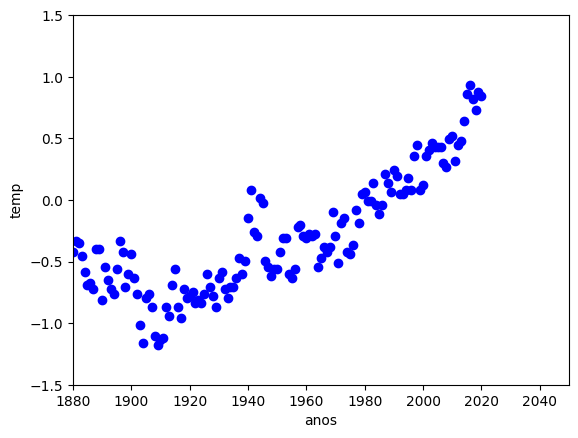

In [9]:
utils.set_graph(
    x_label='anos', y_label='temp',
    x_min=1880, x_max=2050, y_min=-1.5,y_max=1.5)

utils.view_scatter(years_vector, temperatures_vector, color='blue')

# Treinar e visualizar modelo de previsão

O gráfico anterior mostra que a temperatura varia de forma não linear ao longo dos anos e, infelizmente, com tendência crescente nas últimas décadas: **as alterações climáticas são reais!**.

* Vamos agora tentar encontrar a expressão matemática que produza a curva mais simples capaz de melhor representar os vários pontos do gráfico. Dada a não linearidade da curva, vamos usar um polinómio de grau 3.

* Os polinómios de grau 3 têm a seguinte formulação:

* Variando os coeficientes a3, a2, a1 e a0 conseguimos obter as mais variadas curvas, como as seguintes:

* O desafio agora é encontrar os coeficientes que produzem a curva que minimiza a distância média de todos os pontos a essa curva.

* A seguinte linha de código faz exatamente isso: recebe os pontos, que são pares (ano, temperatura) e retorna os coeficientes dos poliómio correto. Baseia-se na função **fit_polynomial**, que recebe como primeiro argumento o vetor com os vários anos e como segundo argumento o vetor com as várias temperaturas, sendo que as posições em ambos os vetores são correspondentes (formam pares).


In [5]:
[a3, a2, a1, a0] = utils.fit_polynomial(years_vector, temperatures_vector)

Tenta descobrir que linha de código permite imprimir no ecrã os valores dos quatro coeficientes.

In [ ]:
[...]

In [ ]:
print(a3,a2,a1,a0)

Vamos de seguida desenhar no ecrã os pontos do conjunto de dados e a curva do polinómio definido por a3, a2, a1 e a0. Podes variar os vários parâmetros do código para obter visualizações diferntes.

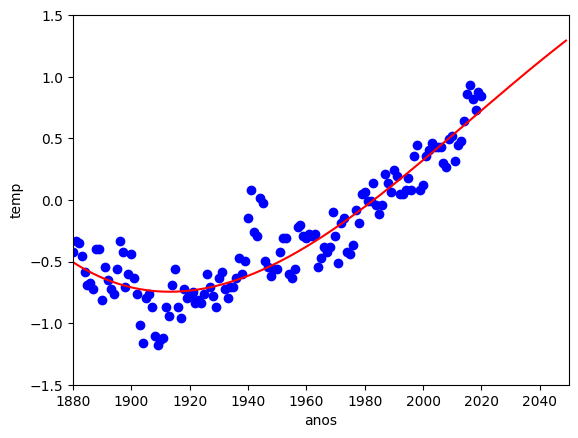

In [6]:
utils.set_graph(
    x_label='anos', y_label='temp',
    x_min=1880, x_max=2050, y_min=-1.5,y_max=1.5)

utils.view_scatter(years_vector, temperatures_vector, color='blue')

utils.view_polynomial(a3, a2, a1, a0, color='red')

* O gráfico anterior é uma ferramenta de visualização de dados científicos de valor crucial para os cientistas ambientais, pois pemite-lhes compreender as tendências de forma qualitativa (por inspecção visual).
* O polinómio prevê os valores de temperatura bem para além do limite temporal imposto pelos dados reais armazenados no ficheiro de dado.
* Contudo, não nos podemos esquecer que isto é apenas uma previsão assumindo que o modelo subjacente aos dados reais é um polinómio de grau 3, que pode não ser verdade.
*Sem uma bola de cristal só podemos saber se o polinómio é uma aproximação correta à posteriori ...

# Criação de sistema de alarme climático

Vamos agora programar um algoritmo para analisar o polinómio e determinar em que anos é que estivemos ou previsivelmente estaremos em crise climática.

Para que possas compreender como usar um polinómio em Python, começa por codificar as seguintes linhas de código, que apresentam no ecrã o resultado de um produto e de uma potência. Como podes ver, o produto é representado por * e a potência por **. Podia ser pior 😜

In [7]:
print("2 vezes 3 é " + str(2*3))
print("2 ao cubo é " + str(2**3))

2 vezes 3 é 6
2 ao cubo é 8


Testa os teus conhecimentos codificando a expressão Python que produz o resultado de 2 ao cubo vezes 5 à quarta.

In [ ]:
print([...])

In [ ]:
print(2**3 * 5**4)

Vamos então agora usar o polinómio para prever temperaturas dado um qualquer ano. Para isso temos de criar a função do polinómio. Essa função recebe um dado x (o ano), avalia o polinómio tendo como base os coeficientes que calculamos previamente e depois devolve o resultado. Em Python isso é feito da seguinte forma.

In [ ]:
def prediction(x):
  return a0 + a1 * x + a2 * x ** 2 + a3 * x ** 3

Podemos agora usar a função **prediction** para estimar a temperatura no ano 2025.

In [ ]:
y = prediction(2025)
print("In 2025 temperature will be " + str(y))

Agora que sabemos estimar temperaturas, podemos criar uma função **alarm** que gera um alarme caso a temperatura suba acima de um dado limiar (**threshold**). Esta função recebe dois argumentos de entrada, o ano ao qual queresmo aplicar o alarme e o limiar de temperatura acima do qual o alarme deve ser gerado. Podes alterar os textos dos alarmes para algo que consideres mais adequado ou divertido! No código surgem alguns *comentários* precedidos de %. Esses *comentários* não são processados pelo computador, são apenas indicações para os humanos lerem, ou seja os programadores.

In [ ]:
def alarm(year, threshold):                                # o cabeçalho da função, que recebe um ano e um limiar.
  temperature = prediction(year)                           # armazenar a temperatura que prevemos para o ano em questão.
  if (temperature > threshold):                            # teste para verificar se a temperatura é superior ao limiar.
    print(str(year) + ": Climate alarm activated!")        # se o teste suceder, então imprimimos esta mensagem.
  else:                                                    # no caso do teste não suceder ...
    print(str(year) + ": No problems.")                    # ... imprimimos esta mensagem.

Vamos então agora testar a noss nova função **alarm** para dois anos diferentes e com um limiar de 0.5. Como podes ver, anos mais recentes parecem ser mais problemáticos. Porque será, certo?! Podes experimentar outros anos e verificar os resultados nos graficos que produzimos anteriormente.

In [ ]:
alarm(1940, 0.5)
alarm(2040, 0.5)

O seguinte código poderia ser usado para gerar alarmes nos anos em que há risco elevado de crise climática, ajudando assim os decisores políticos e a consciencializar os cidadãos. Este código implementa um **ciclo**, que invoca a função **alarm** parameteriza com cada um dos anos entre 1880 e 2024. Em cada iteração do ciclo, a variável **x** toma um dos anos no intervalo definido. Podes alterar esse intervalo e observar os resultados.

In [ ]:
for x in range(1880,2040):
  alarm(x, 0.5)

# Conclusão

* Terminaste o teu primeiro programa de Data Science!!!
* Parabéns!!! 🎉 🥳

**Nota final:** no mundo real todo o código que experimentaste é codificado de forma sequencial e executado todo utomaticamente, sem que tenhamos de pressionar play em cada passo.